# Final Report
Carli Lessard and Men Cheol Jeong  
clessard6 and TODO: Men Cheol's username

### Step 1
Answer the following questions in the final project report:
* Which dataset did you select?
Census Income Data Set [link here](https://archive.ics.uci.edu/ml/datasets/census+income)
* Which regulated domain does your dataset belong to?
This dataset was chosen because it could be used for the protected domains of education and employment
* How many observations are in the dataset?
48842
* How many variables in the dataset?
14
* Which variables did you select as your dependent variables?
Workclass and education
* How many and which variables in the dataset are associated with a legally recognized protected class? Which legal precedence/law (as discussed in the lectures)does each protected class fall under?
5 variables are associated with a legally recognized protected class.
1. age: Age Discrimination in Employment Act of 1967
2. marital status: Civil Rights Act of 1968
3. race: Civil Rights Act of 1964, 1991
4. sex: Equal Pay Act of 1963; Civil Rights Act of 1964, 1991
5. native-country: Civil Rights Act of 1964, 1991

### Step 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from aif360.datasets import StandardDataset

In [21]:
df = pd.read_csv(
    "adult.data", 
    header=None, 
    names= ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "more_or_less_50"])

In [4]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,more_or_less_50
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [22]:
ages = []
for index, row in df.iterrows():
    age = row["age"]
    if age < 40:
        ages.append(0)
    else:
        ages.append(1)
df["age"] = ages
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,more_or_less_50
0,0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,1,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Age
| Age values | Category     |
| ---------- | ------------ |
| 0-39       | 0 (Under 40) |
| 40+        | 1 (Over 40)  |


#### Marital status
| Marital status value  | Category |
| --------------------- | -------- |
| Married-civ-spouse    | 0        |
| Divorced              | 1        |
| Never-married         | 2        |
| Separated             | 3        |
| Widowed               | 4        |
| Married-spouse-absent | 5        |
| Married-AF-spouse     | 6        |

#### Race
| Race value         | Category |
| ------------------ | -------- |
| White              | 0        |
| Asian-Pac-Islander | 1        |
| Amer-Indian-Eskimo | 2        |
| Other              | 3        |
| Black              | 4        |

#### Sex
| Sex    | Description |
| ------ | ----------- |
| Male   | Title       |
| Female | Text        |

#### Native country
| Native Country | Group |
| -------------- | ----------- |
| United-States, Canada, Outlying-US(Guam-USVI-etc), Jamaica , Mexico,  Dominican-Republic, Haiti | North America |
| England, Germany, Greece, Italy, Poland, Portugal, Ireland, France, Hungary, Scotland, Yugoslavia, Holand-Netherlands  | Europe        |
| Puerto-Rico, Honduras, Guatemala, Nicaragua, El-Salvador | Central America        |
| Ecuador, Columbia, Trinadad&Tobago, Peru  | South America        |
| Cambodia, India, Japan, China, Philippines, Vietnam, Laos, Taiwan, Thailand, Hong  | Asia        |
| Iran   | Middle East       |
| South   | Other       |

In [25]:
educ_category = []
for index, row in df.iterrows():
    education = row["education"]
    if education == " Bachelors"or education == " Some-college" or education == " HS-grad" or education == " Prof-school" or education == " Assoc-acdm" or education == " Assoc-voc" or education == " Masters" or education == " Doctorate":
        educ_category.append(0)
    else:
        educ_category.append(1)
df["education_category"] = educ_category
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,more_or_less_50,education_category
0,0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,1,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,1,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


#### Education
| Education                                                                                | Category                         |
| ---------------------------------------------------------------------------------------- | -------------------------------- |
| Bachelors, Some-college, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate | Graduates High School (0)        |
| 11th, 9th, 7th-8th, 12th, 1st-4th, 10th, 5th-6th, Preschool                              | Doesn't Graduate High School (1) |

In [26]:
job_category = []
for index, row in df.iterrows():
    job = row["occupation"]
    if job == " Tech-support" or job == " Sales" or job == " Exec-managerial" or job == " Prof-specialty" or job == " Adm-clerical":
        job_category.append(1)
    else:
        job_category.append(0)
df["job_category"] = job_category
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,more_or_less_50,education_category,job_category
0,0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1
1,1,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,1
2,0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0
3,1,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,1


#### Job Category
| Occupation    | Category |
| ------ | ----------- |
| Craft-repair, Other-service, Handlers-cleaners, Machine-op-inspct, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces | Blue Collar (0) |
| Tech-support, Sales, Exec-managerial, Prof-specialty, Adm-clerical | White Collar (1) |

In [37]:
age_education = df.groupby(['age', 'education_category']).size()
age_education

age  education_category
0    0                     15926
     1                      2398
1    0                     12382
     1                      1855
dtype: int64

In [38]:
marital_education = df.groupby(['marital_status', 'education_category']).size()
marital_education

marital_status          education_category
 Divorced               0                      3986
                        1                       457
 Married-AF-spouse      0                        23
 Married-civ-spouse     0                     13281
                        1                      1695
 Married-spouse-absent  0                       317
                        1                       101
 Never-married          0                      9086
                        1                      1597
 Separated              0                       830
                        1                       195
 Widowed                0                       785
                        1                       208
dtype: int64

In [39]:
race_education = df.groupby(['race', 'education_category']).size()
race_education

race                 education_category
 Amer-Indian-Eskimo  0                       256
                     1                        55
 Asian-Pac-Islander  0                       947
                     1                        92
 Black               0                      2581
                     1                       543
 Other               0                       189
                     1                        82
 White               0                     24335
                     1                      3481
dtype: int64

In [40]:
sex_education = df.groupby(['sex', 'education_category']).size()
sex_education

sex      education_category
 Female  0                      9450
         1                      1321
 Male    0                     18858
         1                      2932
dtype: int64

In [41]:
country_education = df.groupby(['native_country', 'education_category']).size()
country_education

native_country  education_category
 ?              0                      499
                1                       84
 Cambodia       0                       15
                1                        4
 Canada         0                      106
                                      ... 
 United-States  1                     3334
 Vietnam        0                       54
                1                       13
 Yugoslavia     0                       13
                1                        3
Length: 79, dtype: int64

In [42]:
age_job = df.groupby(['age', 'job_category']).size()
age_job

age  job_category
0    0               9486
     1               8838
1    0               6521
     1               7716
dtype: int64

In [43]:
marital_job = df.groupby(['marital_status', 'job_category']).size()
marital_job

marital_status          job_category
 Divorced               0               1907
                        1               2536
 Married-AF-spouse      0                 12
                        1                 11
 Married-civ-spouse     0               7353
                        1               7623
 Married-spouse-absent  0                241
                        1                177
 Never-married          0               5409
                        1               5274
 Separated              0                564
                        1                461
 Widowed                0                521
                        1                472
dtype: int64

In [44]:
race_job = df.groupby(['race', 'job_category']).size()
race_job

race                 job_category
 Amer-Indian-Eskimo  0                 187
                     1                 124
 Asian-Pac-Islander  0                 427
                     1                 612
 Black               0                1826
                     1                1298
 Other               0                 175
                     1                  96
 White               0               13392
                     1               14424
dtype: int64

In [45]:
sex_job = df.groupby(['sex', 'job_category']).size()
sex_job

sex      job_category
 Female  0                3949
         1                6822
 Male    0               12058
         1                9732
dtype: int64

In [46]:
country_job = df.groupby(['native_country', 'job_category']).size()
country_job

native_country  job_category
 ?              0                 276
                1                 307
 Cambodia       0                  13
                1                   6
 Canada         0                  60
                                ...  
 United-States  1               15091
 Vietnam        0                  37
                1                  30
 Yugoslavia     0                  10
                1                   6
Length: 83, dtype: int64

<AxesSubplot:xlabel='age'>

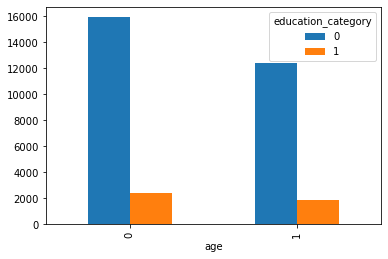

In [48]:
age_education.unstack().plot(kind="bar")

<AxesSubplot:xlabel='marital_status'>

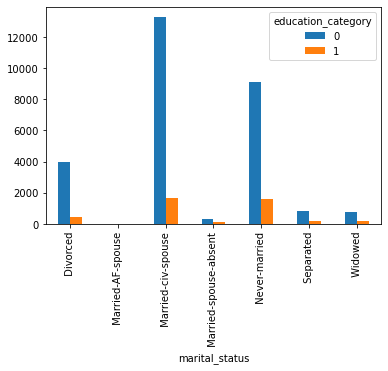

In [49]:
marital_education.unstack().plot(kind="bar")

<AxesSubplot:xlabel='race'>

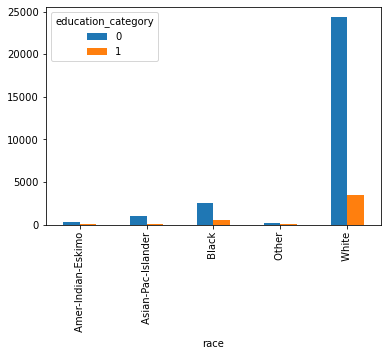

In [50]:
race_education.unstack().plot(kind="bar")

<AxesSubplot:xlabel='sex'>

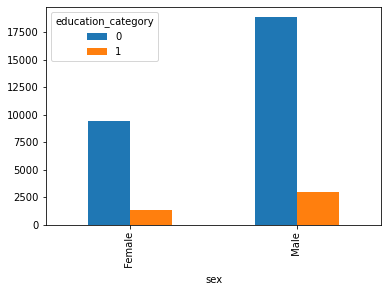

In [51]:
sex_education.unstack().plot(kind="bar")

<AxesSubplot:xlabel='native_country'>

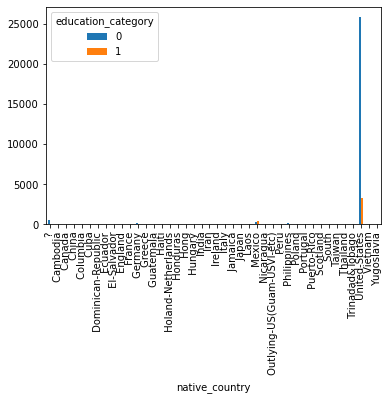

In [52]:
country_education.unstack().plot(kind="bar")